In [15]:
%matplotlib inline
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
link='https://drive.google.com/file/d/1Bli1gOaO00lRjbIEBels68BlPrpFQ3dF/view?usp=share_link'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df_train = pd.read_csv(path,encoding= 'unicode_escape')

In [17]:
df_train.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [18]:
link='https://drive.google.com/file/d/1XlhCmiTP4JFdWTSMKXLTw48F8mz1KuSQ/view?usp=share_link'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df_test = pd.read_csv(path,encoding= 'unicode_escape')

In [19]:
df_test.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


In [20]:
# Check dataset
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column             

In [21]:
train_duplicated = df_train[df_train.duplicated(keep=False)]
train_duplicated

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
196,1,0.00,2,0.0,0,48,0,0,222,5282,652,0
197,1,0.00,2,0.0,0,48,0,0,222,5282,652,0
491,1,0.91,1,0.0,0,0,0,0,0,75,26,1
525,1,0.91,1,0.0,0,0,0,0,0,75,26,1


In [22]:
test_duplicated = df_test[df_test.duplicated(keep=False)]
test_duplicated

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
61,1,0.27,1,0.0,0,0,0,0,0,45,64,1
63,0,0.00,1,0.0,1,0,0,0,0,69,694,1
67,0,0.00,1,0.0,1,0,0,0,0,69,694,1
83,1,0.27,1,0.0,0,0,0,0,0,45,64,1


In [23]:
df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)

<AxesSubplot:ylabel='fake'>

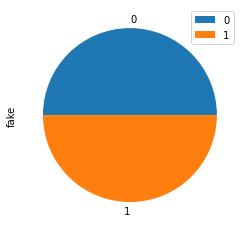

In [24]:
# check balanced of dataset
df_train['fake'].value_counts().plot.pie(legend = ["0", "1"])

#### Data Analyst 

In [28]:
import statistics

Standard Deviation of number of posts is 402.68200161552676 


<Figure size 720x360 with 0 Axes>

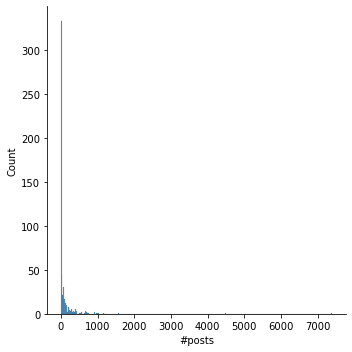

In [29]:
plt.figure(figsize=(10,5))
sns.displot(df_train['#posts'])

print("Standard Deviation of number of posts is % s " % (statistics.stdev(df_train['#posts'])))

In [34]:
print("Standard Deviation of number of followers is % s " % (statistics.stdev(df_train['#followers'])))

Standard Deviation of number of followers is 911722.338266849 


In [35]:
print("Standard Deviation of number of follows is % s " % (statistics.stdev(df_train['#follows'])))

Standard Deviation of number of follows is 919.3413071390999 


In [36]:
import seaborn as sns; sns.set()
import plotly.express as px

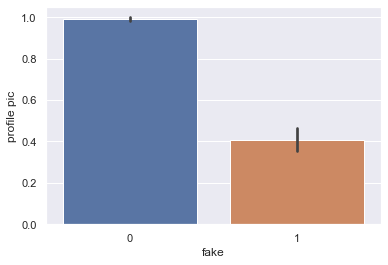

In [37]:
sns_plot = sns.barplot(data=df_train, x="fake", y='profile pic')

In [39]:
y_train = df_train['fake'].values
X_train = df_train.drop('fake', axis=1)
y_test = df_test['fake'].values
X_test = df_test.iloc[:, :-1].values

In [40]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred1 = log_model.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [41]:
log_model_score = log_model.score(X_test, y_test)
log_model_score

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.9067796610169492

In [42]:
from sklearn.metrics import confusion_matrix

Text(0.5, 12.5, 'Predict')

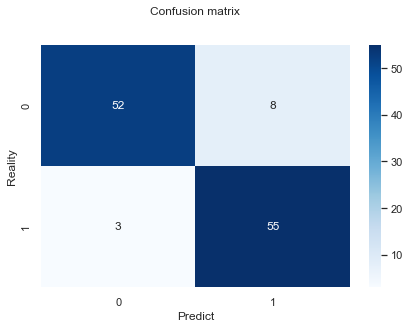

In [45]:
cnf_matrix = confusion_matrix(y_test, y_pred1)
cnf_matrix

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues', fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Reality')
plt.xlabel('Predict')

In [46]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred2 = GNB.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [48]:
GNB_score = GNB.score(X_test, y_test)
GNB_score

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


0.6101694915254238

Text(0.5, 12.5, 'Predict')

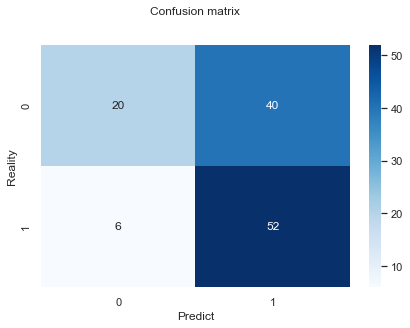

In [49]:
cnf_matrix = confusion_matrix(y_test, y_pred2)
cnf_matrix

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues', fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Reality')
plt.xlabel('Predict')

In [50]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred3 = DT.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [51]:
DT_score = DT.score(X_test, y_test)
DT_score

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8898305084745762

Text(0.5, 12.5, 'Predict')

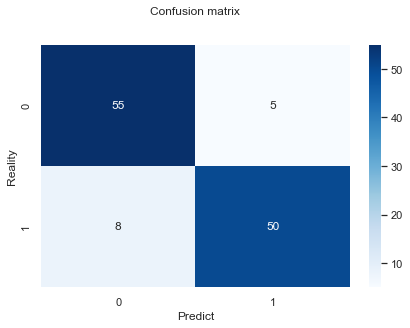

In [52]:
cnf_matrix = confusion_matrix(y_test, y_pred3)
cnf_matrix

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues', fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Reality')
plt.xlabel('Predict')

In [53]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20)
RF.fit(X_train, y_train)
y_pred4 = RF.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [55]:
RF_score = RF.score(X_test, y_test)
RF_score

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.9152542372881356

Text(0.5, 12.5, 'Predict')

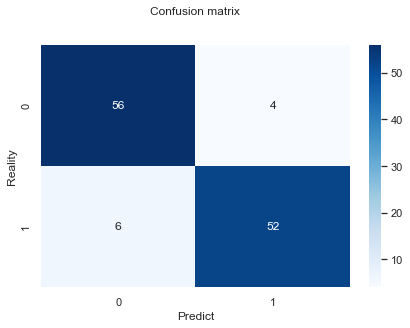

In [56]:
cnf_matrix = confusion_matrix(y_test, y_pred4)
cnf_matrix

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues', fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Reality')
plt.xlabel('Predict')

In [57]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(X_train, y_train)
y_pred5 = KNN.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [58]:
KNN_score = KNN.score(X_test, y_test)
KNN_score

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.864406779661017

Text(0.5, 12.5, 'Predict')

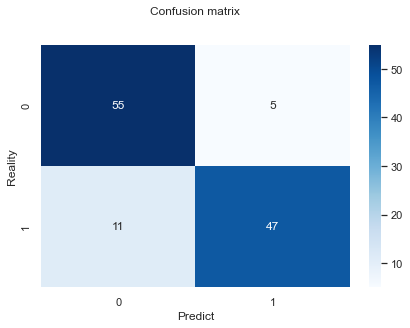

In [59]:
cnf_matrix = confusion_matrix(y_test, y_pred5)
cnf_matrix

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues', fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Reality')
plt.xlabel('Predict')

In [60]:
from sklearn.svm import SVC

SVC = SVC(kernel='linear', C=0.1, gamma=0.3, probability=True)
SVC.fit(X_train, y_train)
y_pred6 = SVC.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [61]:
SVC_score = SVC.score(X_test, y_test)
SVC_score

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.9067796610169492

Text(0.5, 12.5, 'Predict')

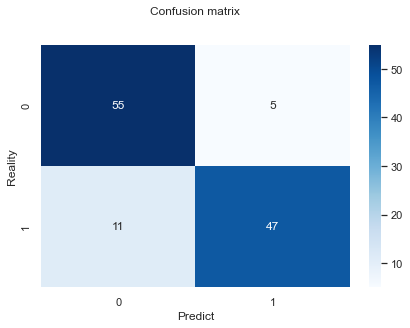

In [62]:
cnf_matrix = confusion_matrix(y_test, y_pred5)
cnf_matrix

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues', fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Reality')
plt.xlabel('Predict')

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


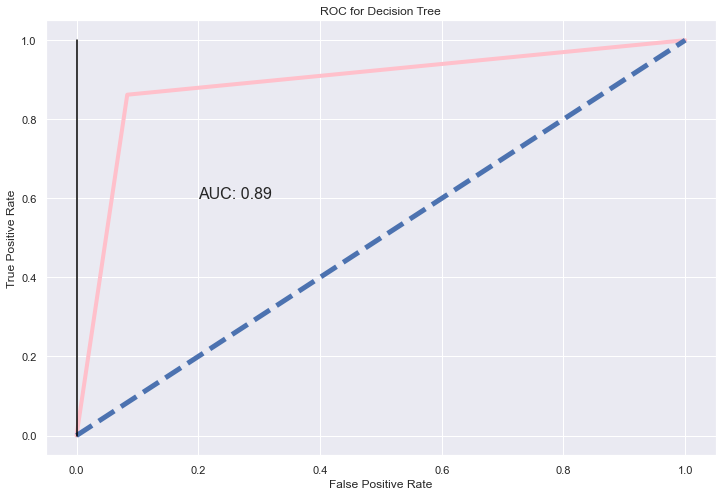

In [63]:
from sklearn.metrics import roc_auc_score, roc_curve

y_proba = DT.predict_proba(X_test)[:, -1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_proba)

plt.figure(figsize=(12,8))
plt.title('ROC for Decision Tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='pink')
plt.plot([0,1], ls='--', linewidth=5)
plt.plot([0,0], [1,0], c='0')
plt.text(0.2, 0.6, 'AUC: {:.2f}'.format(roc_auc_score(y_test, y_proba)), size=16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


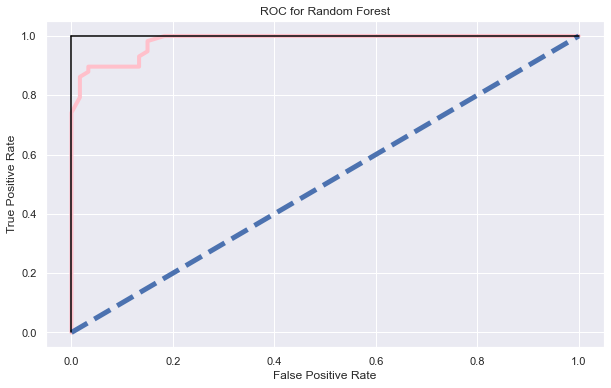

In [64]:
y_proba_2 = RF.predict_proba(X_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_proba_2)
plt.figure(figsize=(10,6))
plt.title('ROC for Random Forest')
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='pink', label = 'AUC')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='0')
plt.plot([1,1],c='0')
#plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities_2)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

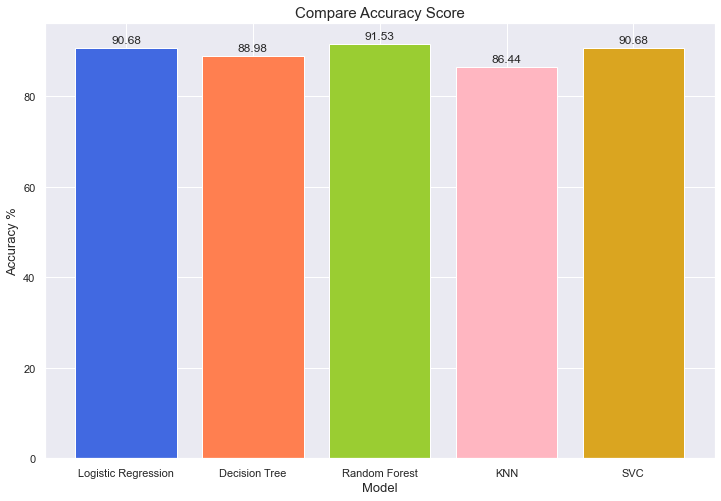

In [69]:
accuracy_score = [log_model_score, DT_score, RF_score, KNN_score, SVC_score]
models = ["Logistic Regression", "Decision Tree", "Random Forest", "KNN", "SVC"]
accuracy_score = [round(x * 100, 2) for x in accuracy_score]

plt.figure(figsize=(12,8))
palette = ['royalblue', 'coral', 'yellowgreen', 'lightpink', 'goldenrod', 'rebeccapurple']
plt.bar(models, accuracy_score, color=palette)

for i, v in enumerate(accuracy_score):
    plt.text(i, v+1, str(v), ha='center', fontsize=12)

plt.xlabel("Model", fontsize=13)
plt.ylabel("Accuracy %", fontsize=13)
plt.title("Compare Accuracy Score", fontsize=15)
plt.show()